In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
null_values = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)).reset_index()
null_values.columns = ['column_name','values']
percent = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100).reset_index()
percent.columns = ['column_name','percent']
percent_1 = pd.DataFrame(percent.loc[:,'percent'])

null_df = pd.concat([null_values,percent_1],axis = 1)
null_df

,column_name,values,percent
0,Credit_History,50,8.143322
1,Self_Employed,32,5.211726
2,LoanAmount,22,3.583062
3,Dependents,15,2.442997
4,Loan_Amount_Term,14,2.280130
5,Gender,13,2.117264
6,Married,3,0.488599
7,Loan_Status,0,0.000000
8,Property_Area,0,0.000000
9,CoapplicantIncome,0,0.000000


In [4]:

df_train['Self_Employed'] = df_train['Self_Employed'].fillna(method = 'bfill')
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Dependents'] = df_train['Dependents'].fillna(method = 'bfill')
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(method = 'bfill')
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
#df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [5]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(method = 'bfill')

In [6]:
df_train['Gender'] = df_train['Gender'].fillna(method = 'bfill')
df_train['Married'] = df_train['Married'].fillna(method = 'bfill')

In [7]:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df = df_train[features]
normalized_df = normalized_df - normalized_df.mean()/normalized_df.std()


In [8]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1,'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1,'No': 0})
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1,'No': 0})
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1,'N': 0})
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',60.0:'5 Years',12.0:'1 Year'})

In [9]:
df_train = df_train.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [10]:
df_train['Education'] =df_train['Education'].map({'Graduate':1,'Not Graduate':0}) 

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null object
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 62.4+ KB


In [12]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
#gen = pd.get_dummies(df_train['Gender'],drop_first = True)
dep = pd.get_dummies(df_train['Dependents'],drop_first = True)
#ed = pd.get_dummies(df_train['Education'],drop_first = True)
lat = pd.get_dummies(df_train['Loan_Amount_Term'],drop_first = True)
pa = pd.get_dummies(df_train['Property_Area'],drop_first = True)

df_train = pd.concat([df_train,dep,lat,pa],axis = 1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df_train = df_train.drop(['Dependents','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)


In [15]:
df_train = pd.concat([df_train,normalized_df],axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
dep_None             614 non-null uint8
dep_One              614 non-null uint8
dep_Two              614 non-null uint8
10 Years             614 non-null uint8
15 Years             614 non-null uint8
20 Years             614 non-null uint8
25 Years             614 non-null uint8
3 Years              614 non-null uint8
30 Years             614 non-null uint8
40 Years             614 non-null uint8
5 Years              614 non-null uint8
7 Years              614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
ApplicantIncome      614 non-null float64
Coapplican

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [17]:
X = df_train.drop(['Loan_ID','Loan_Status'],axis = 1)
y = df_train['Loan_Status']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 5)

In [19]:
#X_test and y_test are for validation:

In [26]:
dec = tree.DecisionTreeClassifier()
dec.fit(X_train,y_train)
ypred = dec.predict(X_train)
#score = accuracy_score(y_train,ypred)
from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix( y_train,ypred)
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])
print('max_depth:',dec.tree_.max_depth)
print("accuracy",accuracy)
print("recall",rec)
print("precision",pre)
print("f1 score",fsc)
print("false positive rate",fpr)


max_depth: 22
accuracy 1.0
recall 1.0
precision 1.0
f1 score 3.0
false positive rate 0.0


In [28]:
## now trying on validation set:

In [29]:
dec = tree.DecisionTreeClassifier()
dec.fit(X_train,y_train)
ypred = dec.predict(X_test)
#score = accuracy_score(y_train,ypred)
from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix( y_test,ypred)
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])
print('max_depth:',dec.tree_.max_depth)
print("accuracy",accuracy)
print("recall",rec)
print("precision",pre)
print("f1 score",fsc)
print("false positive rate",fpr)


max_depth: 21
accuracy 0.7189189189189189
recall 0.4918032786885246
precision 0.5882352941176471
f1 score 1.4754098360655739
false positive rate 0.1693548387096774


In [30]:
## now checking entropy:

In [27]:
tree.DecisionTreeClassifier(criterion = 'entropy')
dec.fit(X_train,y_train)
ypred = dec.predict(X_train)
#score = accuracy_score(y_train,ypred)
from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix( y_train,ypred)
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])
print('max_depth:',dec.tree_.max_depth)
print("accuracy",accuracy)
print("recall",rec)
print("precision",pre)
print("f1 score",fsc)
print("false positive rate",fpr)


max_depth: 22
accuracy 1.0
recall 1.0
precision 1.0
f1 score 3.0
false positive rate 0.0


In [31]:
## now checking it on validation set:

In [32]:
dec = tree.DecisionTreeClassifier(criterion = 'entropy')
dec.fit(X_train,y_train)
ypred = dec.predict(X_test)
#score = accuracy_score(y_train,ypred)
from sklearn.metrics import confusion_matrix
cm1 = metrics.confusion_matrix( y_test,ypred)
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])
print('max_depth:',dec.tree_.max_depth)
print("accuracy",accuracy)
print("recall",rec)
print("precision",pre)
print("f1 score",fsc)
print("false positive rate",fpr)


max_depth: 18
accuracy 0.7567567567567568
recall 0.5517241379310345
precision 0.6274509803921569
f1 score 1.6551724137931034
false positive rate 0.14960629921259844


In [33]:
##so finally choosing entropy and now hyper tuning it.

In [34]:
## feature selection.

In [47]:
dec.feature_importances_

array([0.01723409, 0.02156347, 0.01793608, 0.03604415, 0.2114875 ,
       0.03039451, 0.01555321, 0.        , 0.        , 0.00750546,
       0.00906763, 0.00969799, 0.01422809, 0.0051031 , 0.00756739,
       0.        , 0.        , 0.01486168, 0.00828007, 0.22272133,
       0.12651959, 0.22423467])

In [72]:
df3

,features,score
0,Gender,0.017234
1,Married,0.021563
2,Education,0.017936
3,Self_Employed,0.036044
4,Credit_History,0.211487
5,dep_None,0.030395
6,dep_One,0.015553
7,dep_Two,0.000000
8,10 Years,0.000000
9,15 Years,0.007505


In [ ]:
## LoanAmount,ApplicantIncome,Credit_History,CoApplicantIncome, Self_Employed,dep_None

In [55]:
df1 = pd.DataFrame(dec.feature_importances_)
df1.columns = ['score']
#df1.head()
df2 = pd.DataFrame(X_train.columns)
df2.columns = ['features']
df2.head()
df3 = pd.concat([df2,df1],1)
df3['score'].sort_values(ascending = False)

21    0.224235
19    0.222721
4     0.211487
20    0.126520
3     0.036044
5     0.030395
1     0.021563
2     0.017936
0     0.017234
6     0.015553
17    0.014862
12    0.014228
11    0.009698
10    0.009068
18    0.008280
14    0.007567
9     0.007505
13    0.005103
8     0.000000
7     0.000000
15    0.000000
16    0.000000
Name: score, dtype: float64

In [56]:
## remove dep_Two,10 Years,5 Year,7 Year

In [57]:
## using grid search

In [62]:
from sklearn.model_selection import GridSearchCV
dec1 = tree.DecisionTreeClassifier()
#log1.fit(X_train,y_train)
grid_values = {'max_depth':range(1,20,1),'criterion':['entropy'] }
clf = GridSearchCV(estimator = dec1,param_grid = grid_values )
clf.fit(X_train,y_train)
dt_model = clf.best_estimator_
print(dt_model)






DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [74]:
X_train.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
       'dep_None', 'dep_One', 'dep_Two', '10 Years', '15 Years', '20 Years',
       '25 Years', '3 Years', '30 Years', '40 Years', '5 Years', '7 Years',
       'Semiurban', 'Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount'],
      dtype='object')

In [85]:
X_train1 = X_train.drop(['Gender', 'Education', 'dep_One', 'dep_Two', '10 Years', '15 Years', '20 Years',
       '25 Years', '3 Years', '30 Years', '40 Years', '5 Years', '7 Years',
       'Semiurban', 'Urban'],1)
X_train1.shape

(429, 7)

In [86]:
col = X_train1.columns
X_test1 = X_test[col]
X_test1.shape

(185, 7)

In [87]:
## using iterative feature selected in entropy to find best max depth.

In [88]:
cutoff_df = pd.DataFrame( columns = ['depth','accuracy','recall','precision','f1_score','false positive rate'])
from sklearn.metrics import confusion_matrix
num = range(1,23,1)
for i in num:
    dec = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = i)
    dec.fit(X_train1,y_train)
    ypred = dec.predict(X_test1)
    cm1 = metrics.confusion_matrix( y_test,ypred)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
    fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,rec,pre,fsc,fpr]
print(cutoff_df)

    depth  accuracy    recall  precision  f1_score  false positive rate
1     1.0  0.821622  0.781250   0.490196  2.343750             0.169935
2     2.0  0.821622  0.781250   0.490196  2.343750             0.169935
3     3.0  0.821622  0.781250   0.490196  2.343750             0.169935
4     4.0  0.805405  0.702703   0.509804  2.108108             0.168919
5     5.0  0.805405  0.714286   0.490196  2.142857             0.173333
6     6.0  0.789189  0.657895   0.490196  1.973684             0.176871
7     7.0  0.783784  0.657143   0.450980  1.971429             0.186667
8     8.0  0.767568  0.600000   0.470588  1.800000             0.186207
9     9.0  0.735135  0.519231   0.529412  1.557692             0.180451
10   10.0  0.740541  0.531915   0.490196  1.595745             0.188406
11   11.0  0.735135  0.518519   0.549020  1.555556             0.175573
12   12.0  0.740541  0.528302   0.549020  1.584906             0.174242
13   13.0  0.735135  0.518519   0.549020  1.555556             0

<Figure size 1080x504 with 0 Axes>

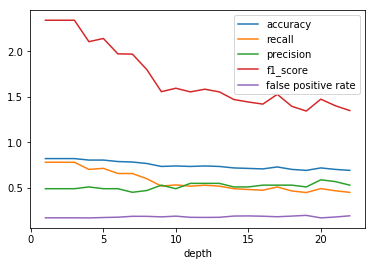

In [89]:
# Let's plot accuracy recall precision f1 score and false positive rate for various depths.
plt.figure(figsize = (15,7))
cutoff_df.plot.line(x='depth', y=['accuracy','recall','precision','f1_score','false positive rate'])

In [90]:
## report 1: features = 22, max_depth = 6
## report 2: features =  4, max_depth = 4 acc = 80.5
## report 3: features = 6, max_depth = 3
## report 4: features = 7, max_depth = 3


In [91]:
## finally testing on testing data

In [94]:
## finally decided that the criterion is entropy and cutoff is 5:

In [92]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=27)

In [93]:
# Do k-fold cross-validation
dec = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
cv_results = cross_val_score(dec,X_train1, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [94]:
# Calculate mean
cv_results.mean()

0.7832558139534884

In [95]:
### now predicting the value:

In [96]:
#X = df_train.drop(['Loan_ID','Loan_Status'],axis = 1)
#y = df_train['Loan_Status']

In [97]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [98]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [99]:

df_test['Credit_History'] = df_test['Credit_History'].fillna(method = 'bfill')
df_test['Gender'] = df_test['Gender'].fillna(method = 'bfill')
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(method = 'bfill')
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Dependents'] = df_test['Dependents'].fillna(method = 'bfill')
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(method = 'bfill')
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
#df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [100]:
## continous variables:
features1 = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df1 = df_test[features1]
normalized_df1 = normalized_df1 - normalized_df1.mean()/normalized_df1.std()

In [101]:
df_test['Education'] =df_test['Education'].map({'Graduate':1,'Not Graduate':0}) 
df_test['Gender'] = df_test['Gender'].map({'Male': 1,'Female': 0})
df_test['Married'] = df_test['Married'].map({'Yes': 1,'No': 0})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 1,'No': 0})
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',350.0:'29 Years',12.0:'1 Year',6.0:'half Year'})

In [102]:
df_test = df_test.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [103]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
#gen1 = pd.get_dummies(df_test['Gender'],drop_first = True)
dep1 = pd.get_dummies(df_test['Dependents'],drop_first = True)
#ed1 = pd.get_dummies(df_test['Education'],drop_first = True)
#lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)
pa1 = pd.get_dummies(df_test['Property_Area'],drop_first = True)
lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)

df_test = pd.concat([df_test,pa1,lat1,dep1],axis = 1)

In [104]:
df_test1 = df_test.drop(['Loan_ID','Dependents','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)
df_test1 = pd.concat([df_test1,normalized_df1],axis = 1)

In [105]:
df_test1 = df_test1.drop(['half Year'],1)

In [106]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 22 columns):
Gender               367 non-null int64
Married              367 non-null int64
Education            367 non-null int64
Self_Employed        367 non-null int64
Credit_History       367 non-null float64
Semiurban            367 non-null uint8
Urban                367 non-null uint8
10 Years             367 non-null uint8
15 Years             367 non-null uint8
20 Years             367 non-null uint8
25 Years             367 non-null uint8
29 Years             367 non-null uint8
3 Years              367 non-null uint8
30 Years             367 non-null uint8
40 Years             367 non-null uint8
7 Years              367 non-null uint8
dep_None             367 non-null uint8
dep_One              367 non-null uint8
dep_Two              367 non-null uint8
ApplicantIncome      367 non-null float64
CoapplicantIncome    367 non-null float64
LoanAmount           367 non-null float64
dtypes:

In [107]:
col = X_train1.columns
df_test2 = df_test1[col]
df_test2.shape

(367, 7)

In [108]:
dec = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
dec.fit(X_train1,y_train)
y_pred = dec.predict(df_test2)

In [109]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [110]:
y_pred_df= y_pred_df.rename(columns={ 0 : 'Loan_Status'})
y_pred_df.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [111]:
loan = pd.DataFrame(df_test['Loan_ID'])

In [112]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
loan.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
final = pd.concat([loan,y_pred_df],axis=1)
final.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [113]:
final["Loan_Status"] = np.where(final.Loan_Status ==1,"Y","N")
final.to_csv('tuneddectree123.csv', index = False)